![gym_photo](gym_photo.jpg)


Hello and welcome to my Market Analysis in Python. In this project I've taken the hypothetical role of a product manager for a fitness studio based in Romania. To offer a good product that is in line with Romania's demands in the fitness world I've decided to conduct a market analysis in Python. 

I will be using multiple datasets in CSV format in the "data" folder, covering international and local data on Google Trends keywords searches related to fitness and related products. 

I will use three popular Python libraries for this project: `pandas`, `seaborn` and `matplotlib` to explore and visualize this data and drive insights.

# Writing functions for loading datasets

Because I will be using multiple CSV files that have similar structures, I will use **two helper functions** to load the CSV files, save them into a Pandas DataFrame and visualize them right away. The datasets that I'm working with can be divided in _two groups:_ datasets that are recorded _weekly_ and have a "week" column, and data that is recorded _by region_ and have a "country" column. Therefore I need two functions for loading both kinds of datasets.

In [1]:
#Import the necessary Python libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='tab10')
%matplotlib inline

   
# Read a CSV file from a given filepath, convert it into a pandas DataFrame, and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data.

def read_file(filepath, plot = True):
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        fig = sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
        fig.set(xlabel='year')
    return df

# Read a CSV file from a given filepath, convert it into a pandas DataFrame, and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. Change to multi=True if more than one keyword is being analyzed, and multi=False if only one keyword is being analyzed. 

def read_geo(filepath, multi=False):
    
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        fig = plt.figure(figsize=(8,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['category'] = file['category'].apply(lambda x: x[:-21])
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y='country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

# Global Workout Demand

First I started by assessing global demand for working out over the years. 

In the graph we can notice that there is a huge increase in popularity right between 2020 and 2021, right when the pandemic started, but we don't know the exact month for sure. Here I try to find the exact month where working out was the most searched topic.

The month with the highest workout demand is: 2020-04-01


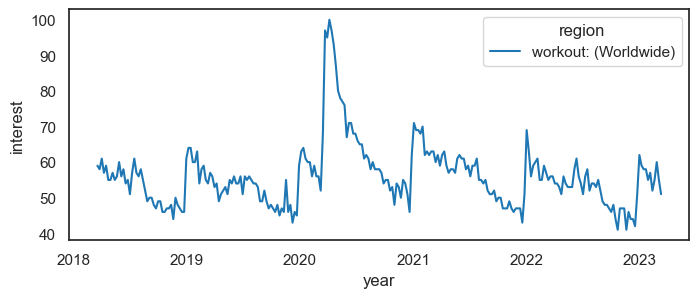

In [2]:
# Load the workout.csv file into a DataFrame using the function for Time series data
workout = read_file("data/workout.csv")

# Convert 'week' column to datetime, so we can later use the .resample() method
workout['week'] = pd.to_datetime(workout['week'])

# Set 'week' column as the index and change the frequency to months (not weeks), and calculate the max average value

workout_by_month = workout.set_index("week").resample('MS').mean(numeric_only=True)
month_high = workout_by_month['interest'].idxmax()
month_str = str(month_high.date())

print("The month with the highest workout demand is: " + month_str)

# Home/Gym Workout Demand Comparison

Here, I am analysing how popular are the terms "home workout", "gym workout", "home gym" over the years to compare between each other. 

After visually assessing the plot below we can see that "home workout" and "home gym" keywords have soared in popularity over the 2020-2021 pandemic period, while "gym workout" has been taking a little dip. The cause of that being the lack of access to a public gym, and going out in general, people therefore trying to make up for it at home. But as the pandemic has ended, and people have access again to public gyms, we can notice how "gym workout" has recovered as the main searched keyword between the three.

The current most searched keyword is: gym workout
The most searched keyword during the pandemic was: home workout


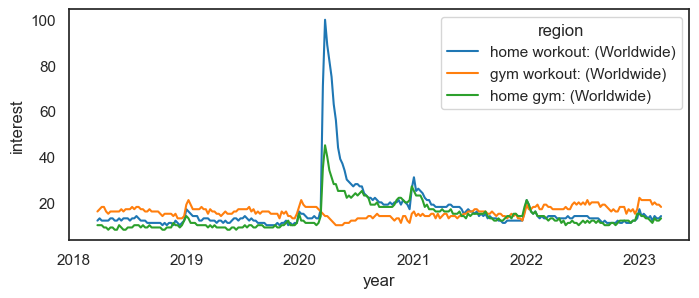

In [4]:
# Load the three_keywords.csv file into a DataFrame and print the most popular keyword during the peak_covid period, and 
# the current most popular keyword

keywords = read_file("data/three_keywords.csv")

current = "gym workout"
peak_covid = "home workout"

print("The current most searched keyword is: " + current)
print("The most searched keyword during the pandemic was: " + peak_covid)

# Top 25 Countries By Workout Demand

So we have seen the global demand for working out is slowly going up since 2018. But what is the demand for working out by country, and which country has the highest demand? Here I'm using the second helper function for loading regional data. 

By assessing the bar plot, we can see that the country with the highest demand is The United States by a margin. And also no signs of Romania in the top 25 countries, so let's find out on what place it is. Apparently Romania is the 39th country in the world by workout demand.

The country with the highest workout demand is: United States
Romania is the 39th country in the world by workout demand


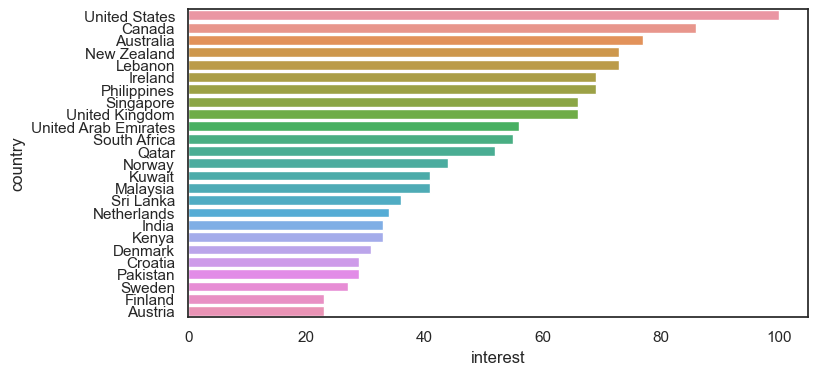

In [6]:
# Load the workout_global.csv using the helper function for geographical data

workout_countries = read_geo('data/workout_global.csv')
workout_countries_by_country = workout_countries.set_index('country').sort_values(by='interest', ascending=False)

top_country = "United States"

print("The country with the highest workout demand is: " + top_country)
print("Romania is the " + str(workout_countries_by_country.index.get_loc('Romania')) + "th country in the world by workout demand")

# Keyword Demand by Country

Here we load and visualize the "geo_three_keywords.csv" file with the helper function for geographical data, using the "multi" argument as True, because the dataset recorded all the three keywords. 

The plot itself it's not as insightful, since there is a lot of information in it, but we can subset the DataFrame for the biggest 15 countries in Europe to analyze further.

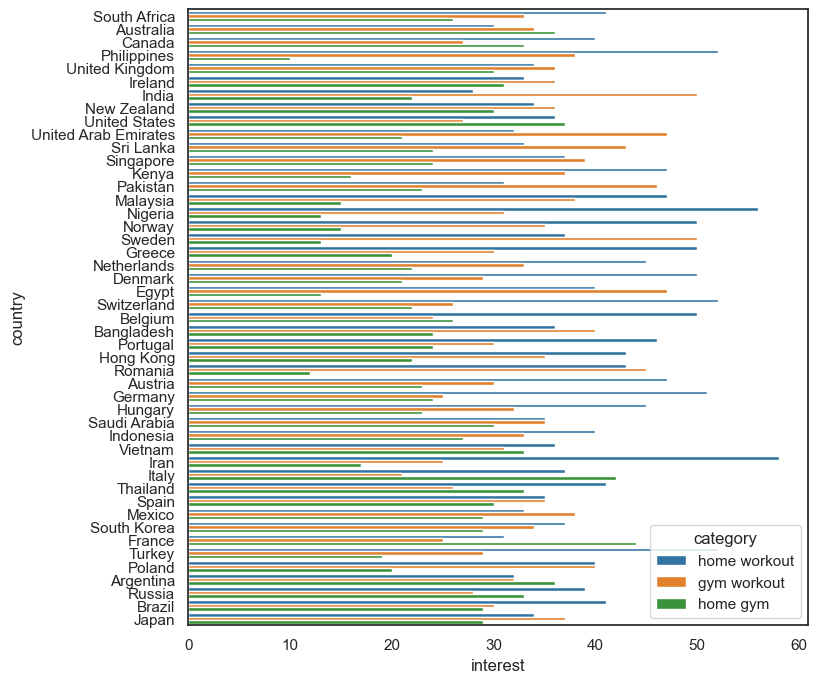

In [7]:
# Load the geo_three_keywords.csv using the read_geo helper function

geo_categories = read_geo('data/geo_three_keywords.csv', multi=True)

# Subset geo_categories for biggest 15 countries in Europe

biggest_15 = geo_categories.loc[geo_categories['country'].isin(["Russia", "Ukraine", "France", "Spain", "Sweden", "Germany", "Norway", "Finland", "Poland", "Italy", "United Kingdom", "Greece", "Romania", "Belarus", "Bulgaria"])]


# Top Demand In The Biggest Countries in Europe

By using the subset we created earlier we can view the interest for each keyword in every country. 

Here we can see that Romania has big demand for "gym workout" and "home workout" with both having values over 40, but a very low interest in "home gym". We'll subset Romania's interest values and the mean in each category to compare later.

In [8]:
# Index the biggest_15 DataFrame by country for visualization

biggest_15_by_country = biggest_15.set_index(['country', 'category']).sort_index()
display(biggest_15_by_country.unstack())

# Calculate the mean for each category

categories_mean = biggest_15.groupby('category').mean(numeric_only=True).astype(int).reset_index()

# Subset the rows with Romania's interest values

categories_RO = biggest_15[biggest_15['country'] == 'Romania']


interest                      
category       gym workout home gym home workout
country                                         
France                  25       44           31
Germany                 25       24           51
Greece                  30       20           50
Italy                   21       42           37
Norway                  35       15           50
Poland                  40       20           40
Romania                 45       12           43
Russia                  28       33           39
Spain                   35       30           35
Sweden                  50       13           37
United Kingdom          36       30           34

# Romania's Highest Demands

Here we are going to compare Romania's demand in the "home workout", "gym workout" and "home gym" categories with the average interest in each category to find out which product is best fit for romanian people. 

From the barplot below we can see that Romania has an above-average demand in "gym workout" and "home workout", and that it has a low demand in "home gym".

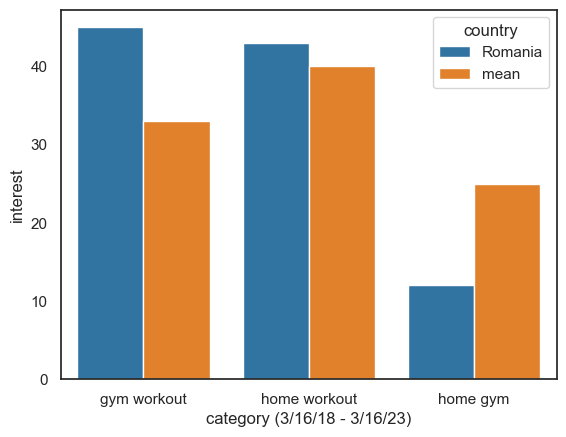

In [9]:
# Concat both DataFrames

categories_mean['country'] = 'mean'
categories_RO_mean = pd.concat([categories_RO, categories_mean])

# Plot the merged DataFrame to see in which category is Romania a potential customer

sns.set_context("notebook")
plot = sns.barplot(x='category', y='interest', data=categories_RO_mean, hue='country')
plot.set(xlabel='category (3/16/18 - 3/16/23)')
plt.show()

# Analyzing Fitness Subtrends
Now that we know that Romania has interest in gym and home workout let's explore some popular fitness activities or goals that can be done at the gym or at home, to have a better outlook on what we can offer. 

From the plot we can conclude that "yoga" is by far the most in demand fitness activity. 

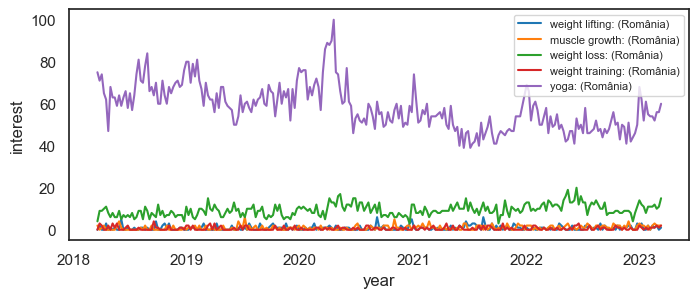

In [10]:
#Load the new dataset with the specific trends

read_file("data/trends_keywords_ro.csv")
plt.legend(fontsize=8, loc='upper right')
plt.show()


# Conclusion


Now that we are the end of the analysis, we can conclude that the fitness demand is still growing as of 2023. The best direction we should follow to satisfy this demand is by building products for both gym goers or people who prefer working out at home. A workout app, building more local gyms/yoga studios or building a network of high-quality personal instructors that can help you with getting started at the gym of your choice or at home are all strong ideas to consider for a good product.

Thank you for going over my project. I hope you have a nice day!